In [1]:
%matplotlib inline 
import matplotlib.pylab
import numpy as np
import pandas as pd

### Let's find some time series data
hint: http://pandas.pydata.org/pandas-docs/stable/remote_data.html

In [2]:
import pandas_datareader.data as web
start = pd.Timestamp('2010-1-1')
end = pd.Timestamp('2013-1-27')
f = web.DataReader("F", 'google', start, end)

In [3]:
f.head()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-04,10.17,10.28,10.05,10.28,60855796
2010-01-05,10.45,11.24,10.40,10.96,215620138
2010-01-06,11.21,11.46,11.13,11.37,200070554
2010-01-07,11.46,11.69,11.32,11.66,130201626
2010-01-08,11.67,11.74,11.46,11.69,130462912


### Plot the high and low values of the stock for July and August 2012

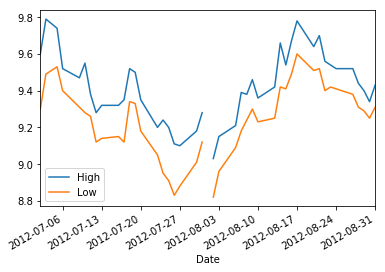

In [4]:
# %load snippets/prac1.py
f['2012-07':'2012-08'][['High', 'Low']].plot()

### Is the variance of the trading volume relatively stable over time?

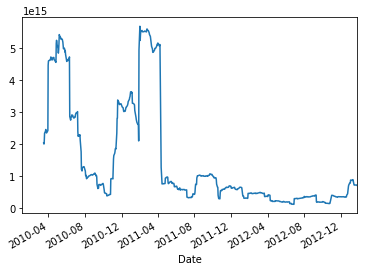

In [6]:
# %load snippets/prac2.py
r = f.rolling(50).var()['Volume'].plot()

### Is the expanding window variance of the trading volume relatively stable over time?

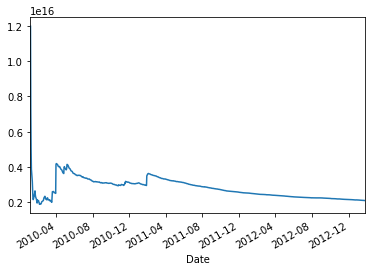

In [7]:
# %load snippets/prac3.py
f.expanding(min_periods=1, center=False).var()['Volume'].plot()

### On how many days did the stock open higher than it opened on the previous day?

Hint: check out .tshift() in the pandas docs
http://pandas.pydata.org/pandas-docs/stable/timeseries.html#shifting-lagging

In [8]:
lagged = f.shift(1)
sum((f.Open - lagged.Open)>0)

382

In [9]:
# %load snippets/prac4.py
sum((f.Open - lagged.Open)>0)/len(f.Open)

0.49546044098573283

### And did the 'up' days become more or less frequent over time?

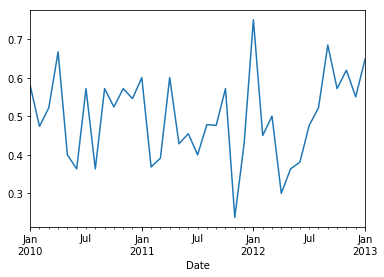

In [10]:
f['DayGain'] = (f.Open - lagged.Open) > 0
f.resample('M').mean()['DayGain'].plot()

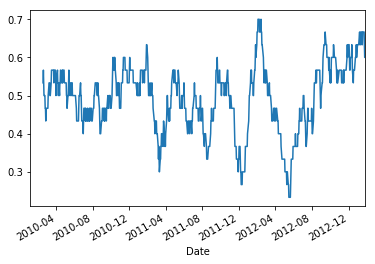

In [11]:
# %load snippets/prac5.py
f.rolling(window = 30)['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

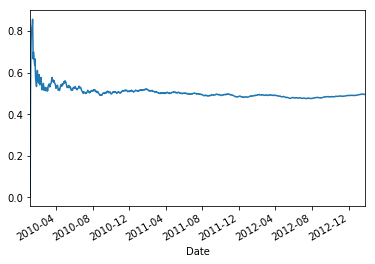

In [12]:
f.expanding()['DayGain'].apply(lambda x: len([x_i for x_i in x if x_i > 0])/len(x)).plot()

### Compute and plot the mean monthly High value of the stock

In [13]:
# %load snippets/prac6.py

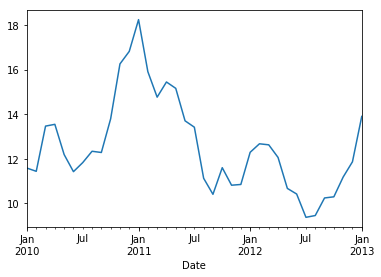

In [14]:
f.resample('M').mean()['High'].plot()

### Explore the variance of the differenced volume

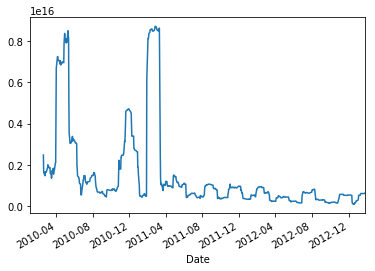

In [15]:
# %load snippets/prac7.py
(f - f.shift(1)).rolling(window=30).var()['Volume'].plot()

### Does the lagged time series correlate with itself?

In [16]:
# %load snippets/prac8.py
pd.DataFrame({'real':f.Volume, 'lagged':f.Volume.shift()}).corr()

,lagged,real
lagged,1.000000,0.649776
real,0.649776,1.000000


In [17]:
np.corrcoef(f.Volume[1:], f.Volume.shift(1)[1:])

array([[ 1.        ,  0.64977551],
       [ 0.64977551,  1.        ]])